Logistic Regression (4 features) — LOO accuracy = 0.667

Confusion Matrix [rows=true 0,1 ; cols=pred 0,1]:
 [[1 3]
 [0 5]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.62      1.00      0.77         5

    accuracy                           0.67         9
   macro avg       0.81      0.62      0.58         9
weighted avg       0.79      0.67      0.61         9



,metal,y_true,logreg_pred,logreg_proba_1,ok
0,Rh1,1,1,0.562,True
1,Ir1,1,1,0.603,True
2,Ni1,1,1,0.555,True
3,Pd1,1,1,0.530,True
4,Pt1,1,1,0.541,True
5,Cu1,0,1,0.583,False
6,Ag1,0,1,0.560,False
7,Au1,0,1,0.635,False
8,Pb1,0,0,0.450,True


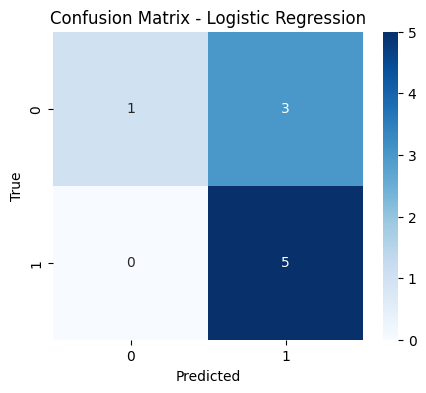

In [1]:
# =========================================
# Regressão Logística Clássica (4 features)
# =========================================

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------------------
# 1) Carregar dataset
# -----------------------------------------
df = pd.read_csv("metal_features_reduzido_com_y.csv")

# Features selecionadas
features = ["Mendeleev", "Tmelt_K", "rcov_A", "d_band_center"]

X = df[features].to_numpy(dtype=float)
y = df["y"].to_numpy(dtype=int)
metals = df["metal"].astype(str).tolist()

# -----------------------------------------
# 2) Normalização (0,1)
# -----------------------------------------
scaler = MinMaxScaler()
Xn = scaler.fit_transform(X)

# -----------------------------------------
# 3) Leave-One-Out Cross Validation
# -----------------------------------------
loo = LeaveOneOut()
y_true, y_pred, y_prob = [], [], []

for train_idx, test_idx in loo.split(Xn):
    model = LogisticRegression(max_iter=2000, solver="liblinear")
    model.fit(Xn[train_idx], y[train_idx])
    
    pred = model.predict(Xn[test_idx])[0]
    prob = model.predict_proba(Xn[test_idx])[0, 1]
    
    y_pred.append(pred)
    y_prob.append(prob)
    y_true.append(y[test_idx][0])

# -----------------------------------------
# 4) Avaliação
# -----------------------------------------
acc = accuracy_score(y_true, y_pred)
cm  = confusion_matrix(y_true, y_pred, labels=[0,1])

print(f"Logistic Regression (4 features) — LOO accuracy = {acc:.3f}")
print("\nConfusion Matrix [rows=true 0,1 ; cols=pred 0,1]:\n", cm)
print("\nClassification Report:\n", classification_report(y_true, y_pred))

# Tabela de resultados
res = pd.DataFrame({
    "metal": metals,
    "y_true": y_true,
    "logreg_pred": y_pred,
    "logreg_proba_1": np.round(y_prob, 3),
    "ok": (np.array(y_true) == np.array(y_pred))
})
display(res)

# -----------------------------------------
# 5) Gráfico da Matriz de Confusão
# -----------------------------------------
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()
